In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlalchemy
import psycopg2
from sqlalchemy import create_engine, text
import scipy.stats as stats
from scipy.stats import ttest_ind
warnings.filterwarnings('ignore')

In [3]:
#load dataset
db_name = 'vendordatabase'
db_user = 'postgres'
db_password = 'postgres'
db_host = 'localhost'
db_port = '5432'

try:
    conn = psycopg2.connect(
        dbname = 'vendordatabase',
        user = 'postgres',
        password = 'postgres',
        host = 'localhost',
        port = '5432'
    )
    engine = create_engine(f'postgresql+psycopg2://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')
    print("Connection to postgresql is successful!")
except psycopg2.Error as e:
    print(f"Error connecting postgresql: {e}")


Connection to postgresql is successful!


In [4]:
#fetching data from vendor_sales_summary table
df = pd.read_sql_query("SELECT * FROM vendor_sales_summary", engine)
df.head()

,vendornumber,vendorname,description,brand,purchaseprice,volume,actual_price,total_purchase_quantity,total_purchase_dollars,totalsalesdollars,totalsalesprice,totalsalesquantity,totalexcisetax,freightcost,grossprofit,profitmargin,stockturnover,salestopurchaseratio
0,1128,BROWN-FORMAN CORP,Jack Daniels No 7 Black,1233,26.27,1750.0,36.99,145080.0,3811251.60,5101919.51,672819.31,142049.0,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,Tito's Handmade Vodka,3405,23.19,1750.0,28.99,164038.0,3804041.22,4819073.49,561512.37,160247.0,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,Absolut 80 Proof,8068,18.24,1750.0,24.99,187407.0,3418303.68,4538120.60,461140.15,187140.0,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,Capt Morgan Spiced Rum,4261,16.17,1750.0,22.99,201682.0,3261197.94,4475972.88,420050.01,200412.0,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,Ketel One Vodka,3545,21.89,1750.0,29.99,138109.0,3023206.01,4223107.62,545778.28,135838.0,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [5]:
print(df.shape)
print(df.dtypes)

(10692, 18)
vendornumber                 int64
vendorname                  object
description                 object
brand                        int64
purchaseprice              float64
volume                     float64
actual_price               float64
total_purchase_quantity    float64
total_purchase_dollars     float64
totalsalesdollars          float64
totalsalesprice            float64
totalsalesquantity         float64
totalexcisetax             float64
freightcost                float64
grossprofit                float64
profitmargin               float64
stockturnover              float64
salestopurchaseratio       float64
dtype: object


---
# Exploratory Data Analysis
- Our initial phase involved a comprehensive review of the database tables to identify key variables and their interrelationships, guiding our selection for subsequent analysis.
- In this current phase of Exploratory Data Analysis, we will focus on the resultant consolidated table. Our objective is to analyze the distribution of each column to uncover data patterns, detect anomalies, and validate data quality. This meticulous examination is crucial before proceeding with further analytical stages.
---

In [7]:
#summary statistics
df.describe()

,vendornumber,brand,purchaseprice,volume,actual_price,total_purchase_quantity,total_purchase_dollars,totalsalesdollars,totalsalesprice,totalsalesquantity,totalexcisetax,freightcost,grossprofit,profitmargin,stockturnover,salestopurchaseratio
count,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,1.069200e+04,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,1.069200e+04,10692.000000,10692.000000
mean,10650.649458,18039.228769,24.385303,847.360550,35.643671,3140.886831,3.010669e+04,4.223907e+04,18793.783627,3077.482136,1774.226259,61433.763214,1.213238e+04,-inf,1.706793,2.504390
std,18753.519148,12662.187074,109.269375,664.309212,148.246016,11095.086769,1.230678e+05,1.676553e+05,44952.773386,10952.851391,10975.582240,60938.458032,4.622434e+04,NaN,6.020460,8.459067
min,2.000000,58.000000,0.360000,50.000000,0.490000,1.000000,7.100000e-01,0.000000e+00,0.000000,0.000000,0.000000,0.090000,-5.200278e+04,-inf,0.000000,0.000000
25%,3951.000000,5793.500000,6.840000,750.000000,10.990000,36.000000,4.534575e+02,7.292200e+02,289.710000,33.000000,4.800000,14069.870000,5.292000e+01,1.332451e+01,0.807229,1.153729
50%,7153.000000,18761.500000,10.455000,750.000000,15.990000,262.000000,3.655465e+03,5.298045e+03,2857.800000,261.000000,46.570000,50293.620000,1.399640e+03,3.040546e+01,0.981529,1.436894
75%,9552.000000,25514.250000,19.482500,750.000000,28.990000,1975.750000,2.073825e+04,2.839691e+04,16059.562500,1929.250000,418.650000,79528.990000,8.660200e+03,3.995613e+01,1.039342,1.665449
max,201359.000000,90631.000000,5681.810000,20000.000000,7499.990000,337660.000000,3.811252e+06,5.101920e+06,672819.310000,334939.000000,368242.800000,257032.070000,1.290668e+06,9.971666e+01,274.500000,352.928571


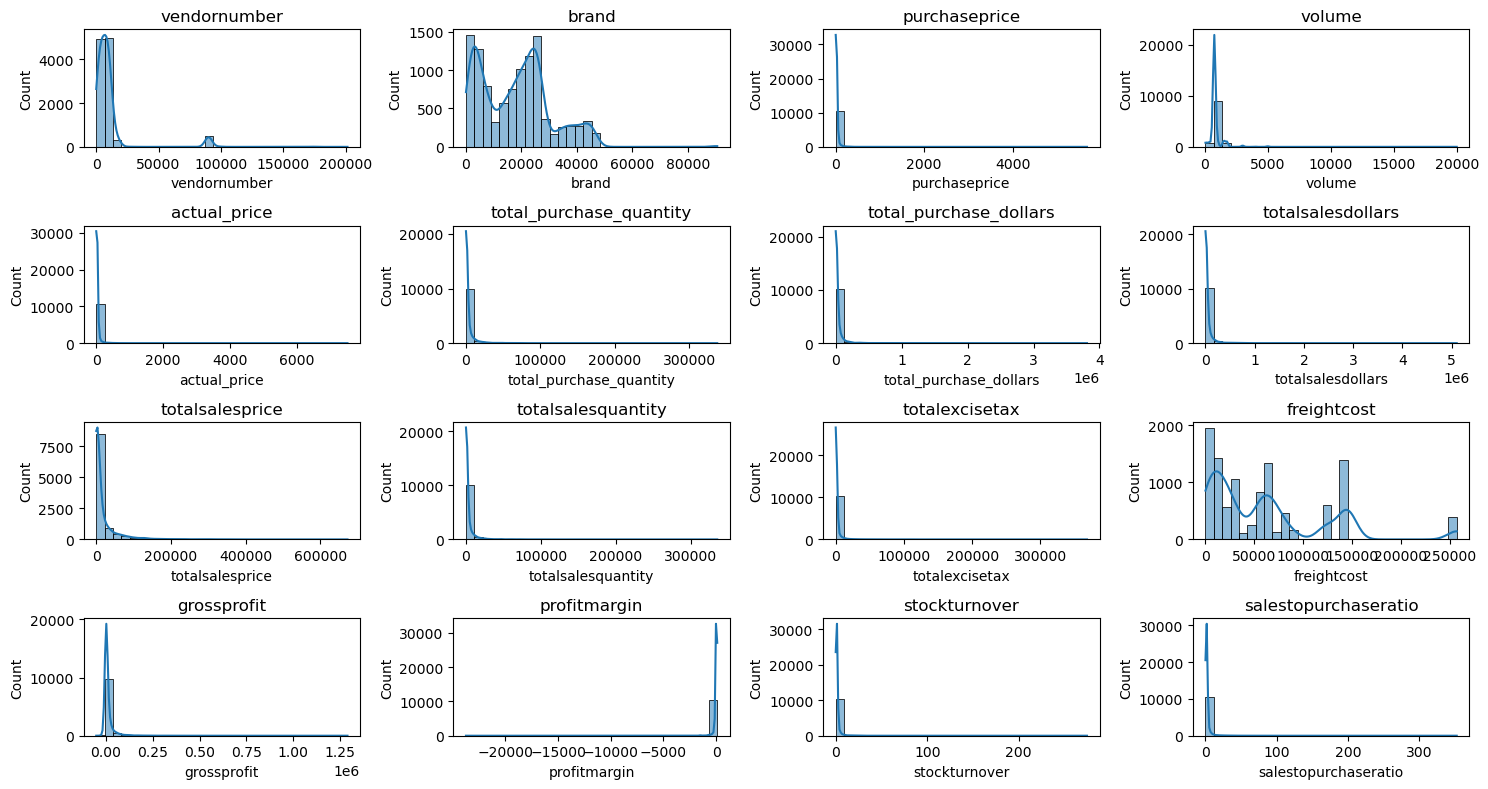

In [8]:
#distribution plots for numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,8))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

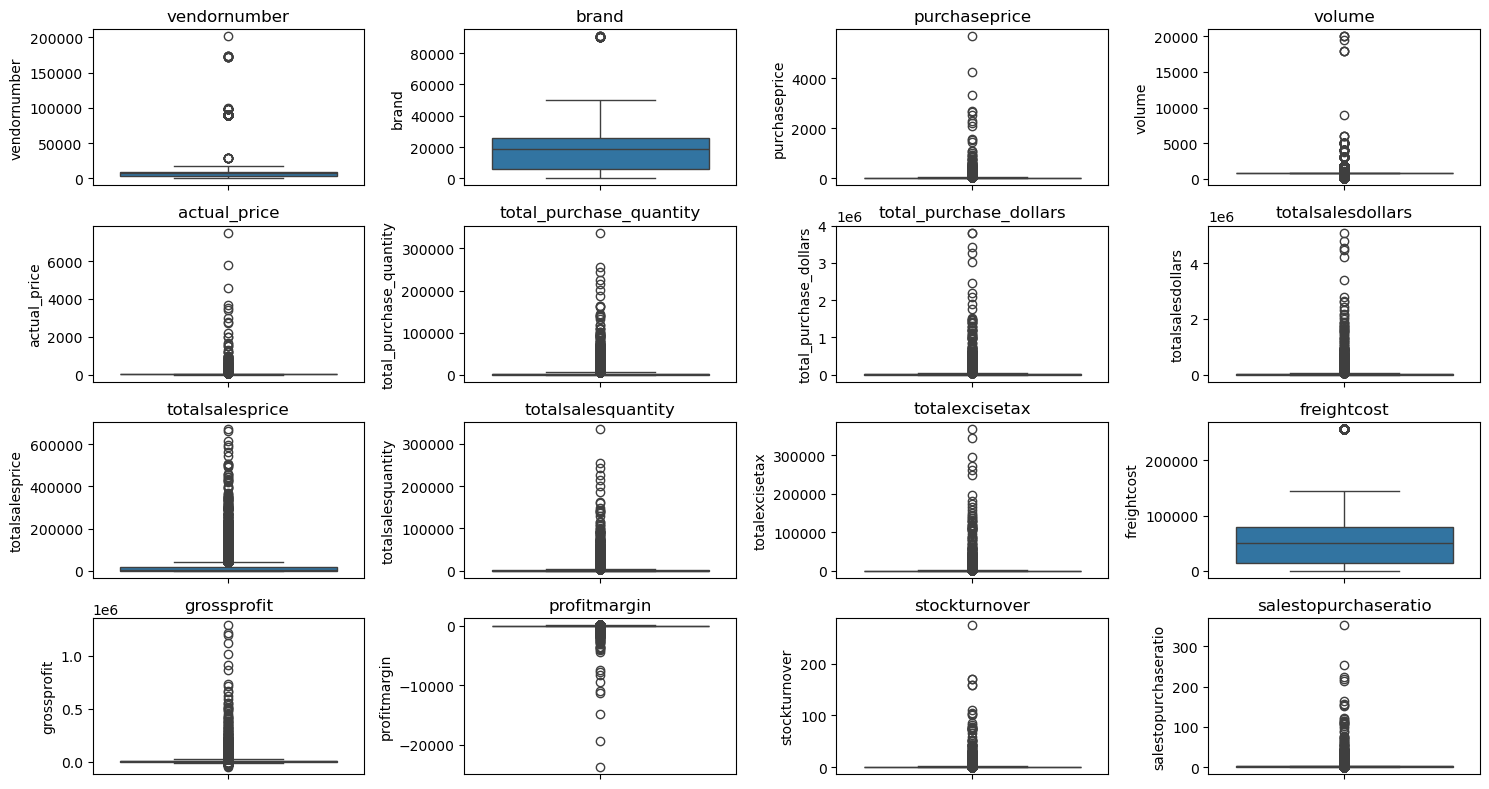

In [9]:
#outlier detection using boxlplot
plt.figure(figsize=(15,8))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
vendornumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
purchaseprice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
actual_price,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
total_purchase_quantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
total_purchase_dollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
totalsalesdollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
totalsalesprice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05
totalsalesquantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05


Based on the descriptive statistics table you provided, here are some key insights for each column:

* `*`vendornumb`r`**: With a count of $10692$, the `vendornumber` has a wide range ($1$ to $201359$) and a high standard deviation ($191482$), suggesting a diverse set of vendors. The mean ($106506$) is significantly higher than the median ($3951$), indicating a right-skewed distribution, where there are a few vendors with very high IDs. The $75^{th}$ percentile ($9552$) is much closer to the median, reinforcing the presence of larger vendor IDs pulling the mean up.

* **`brand`**: Similar to `vendornumber`, the `brand` column ($10692$ entries) also exhibits a wide range ($58$ to $90631$) and a high standard deviation ($12662$), pointing to a large variety of brands. The mean ($18039$) is higher than the median ($5793.5$), suggesting a right-skewed distribution, possibly due to a few brands with very high IDs.

* **`purchaseprice`**: The `purchaseprice` (count $10692$) has a mean of $24.38$ and a relatively high standard deviation of $109.27$, indicating significant variability in purchase prices. The minimum price is $0.36$, while the maximum is $5681.81$. The median is $10.45$, which is considerably lower than the mean, suggesting a right-skewed distribution with some very high purchase prices pulling up the average. The $75^{th}$ percentile is $19.48$, further emphasizing this skewness.

* **`volume`**: The `volume` column ($10692$ entries) shows a mean of $847.36$ and a standard deviation of $664.31$. The minimum volume is $0$, and the maximum is $20000$. The median is $750$, which is close to the $25^{th}$ percentile ($750$) and the $75^{th}$ percentile ($750$). This suggests that a significant portion of the volumes are clustered around $750$, indicating a common volume value. However, the large maximum value points to some instances of very high volume.

* **`actual_price`**: The `actual_price` (count $10692$) has a mean of $35.64$ and a standard deviation of $148.25$. The prices range from $0.49$ to $7499.99$. The median is $15.99$, which is much lower than the mean, indicating a right-skewed distribution, likely due to a few very high actual prices.

* **`total_purchase_quantity`**: With a count of $10692$, `total_purchase_quantity` has a mean of $3140.89$ and a very high standard deviation of $11095.09$, indicating extreme variability. The values range from $1$ to $337660$. The median is $262$, which is significantly lower than the mean, highlighting a heavily right-skewed distribution with a few instances of extremely large purchase quantities.

* **`total_purchase_dollars`**: The `total_purchase_dollars` (count $10692$) has a mean of $30106.69$ and an extremely high standard deviation of $123067.80$. The range is vast, from $0.71$ to $3811252$. The median is $3655.46$, which is much lower than the mean, indicating a heavily right-skewed distribution with substantial outliers in higher purchase dollar amounts.

* **`totalsalesdollars`**: This column ($10692$ entries) has a mean of $42239.07$ and a very large standard deviation of $167655.27$. The range is from $0.00$ to $5101920$. The median is $5298.05$, which is considerably lower than the mean, suggesting a heavily right-skewed distribution with a few very large sales transactions driving up the average.

* **`totalsalesprice`**: The `totalsalesprice` (count $10692$) has a mean of $18793.78$ and a standard deviation of $44952.77$. The prices range from $0.00$ to $672819.3$. The median is $2857.80$, indicating a substantial right skew, with a few exceptionally high sales prices.

* **`totalsalesquantity`**: With a count of $10692$, `totalsalesquantity` has a mean of $3077.48$ and a standard deviation of $10952.85$. The quantities range from $0.00$ to $334939$. The median is $261$, significantly lower than the mean, pointing to a heavily right-skewed distribution with a few very large sales quantities.

* **`totalexcisetax`**: The `totalexcisetax` (count $10692$) has a mean of $1774.23$ and a high standard deviation of $10975.58$. The tax amounts range from $0.00$ to $368242.8$. The median is $46.57$, which is much lower than the mean, indicating a heavily right-skewed distribution with some very large excise tax values.

* **`freightcost`**: The `freightcost` (count $10692$) has a mean of $61433.76$ and a standard deviation of $60938.46$. The costs range from $0.09$ to $257032.1$. The median is $50293.62$, which is somewhat lower than the mean, suggesting a moderate right-skew in the distribution.

* **`grossprofit`**: The `grossprofit` (count $10692$) has a mean of $12132.38$ and a large standard deviation of $46224.34$. The minimum value is $-52002.78$, indicating instances of losses, while the maximum is $1290668$. The median is $1399.64$, significantly lower than the mean, which suggests a heavily right-skewed distribution with a few very high gross profits pulling the mean up, alongside the presence of losses.

* **`profitmargin`**: This column ($10692$ entries) has a mean that is not meaningful due to the `-inf` minimum value and `NaN` standard deviation, which likely indicates division by zero in the calculation of profit margin. This is a critical data quality issue that needs to be addressed. The maximum profit margin is $9.97$ and the median is $30.41$. The $25^{th}$ percentile is $13.32$ and the $75^{th}$ percentile is $39.96$. This means that for valid `profitmargin` values, the majority of values are positive and reasonably distributed between $13.32$ and $39.96$. The presence of `-inf` needs to be investigated to understand the cause (e.g., zero sales or negative sales).

* **`stockturnover`**: The `stockturnover` (count $10692$) has a mean of $1.71$ and a standard deviation of $6.02$. The values range from $0.00$ to $274.5$. The median is $0.98$, indicating that half of the stock turnovers are less than or equal to $0.98$. The mean being higher than the median and the large maximum value suggest a right-skewed distribution with some exceptionally high stock turnovers.

* **`salestopurchaseratio`**: The `salestopurchaseratio` (count $10692$) has a mean of $2.50$ and a standard deviation of $8.46$. The values range from $0.00$ to $352.93$. The median is $1.44$, which is lower than the mean, indicating a right-skewed distribution with some instances of very high sales to purchase ratios.

In summary, many of the monetary and quantity-related columns (`purchaseprice`, `actual_price`, `total_purchase_quantity`, `total_purchase_dollars`, `totalsalesdollars`, `totalsalesprice`, `totalsalesquantity`, `totalexcisetax`, `grossprofit`) exhibit strong right-skewness, with means significantly higher than medians and large standard deviations. This suggests the presence of outliers or a few very large transactions that significantly influence the average. The `profitmargin` column has a data quality issue due to the `-inf` value, requiring further investigation. The `volume` column shows a clustering around $750$, indicating a common volume size. Overall, the data suggests a wide range of values and a need for further investigation into the distribution of the skewed variables and the cause of the `profitmargin` issue.

The provided descriptive statistics strongly suggest the presence of **outliers** in many of the columns, particularly those related to monetary values and quantities. Outliers are data points that significantly differ from other observations, often indicating variability in measurement, experimental errors, or simply novel occurrences.

Here's a breakdown of how the statistics hint at outliers and for which columns:

**Key Indicators of Outliers from Descriptive Statistics:**

1.  **Large Difference between Mean and Median (50th Percentile):** When the mean is significantly larger than the median, it typically indicates a **right-skewed distribution**, often caused by a few extremely high values pulling the mean upwards.
2.  **High Standard Deviation Relative to the Mean:** A very large standard deviation suggests a wide spread of data, which can be due to extreme values.
3.  **Extreme Minimum or Maximum Values Compared to Quartiles:** If the `max` value is many times larger than the `75%` quartile, or if the `min` value is many times smaller than the `25%` quartile, it strongly suggests outliers.
4.  **Negative or Infinite Values in Positively-Constrained Metrics:** For metrics that should typically be positive (like price, quantity, profit margin), negative or infinite values clearly indicate anomalies.

**Columns Highly Suggestive of Outliers:**

* **`vendornumber` and `brand`:**
    * **Insight:** Both show a significant difference between their mean and median (e.g., `vendornumber` mean $106506$ vs. median $3951$; `brand` mean $18039$ vs. median $5793.5$). The max values ($201359$ and $90631$) are much higher than their respective $75^{th}$ percentiles ($9552$ and $25514$).
    * **Outlier Indication:** There are likely a few very high vendor and brand IDs that are statistical outliers.

* **`purchaseprice`, `actual_price`:**
    * **Insight:** Mean is significantly higher than the median (e.g., `purchaseprice` mean $24.38$ vs. median $10.45$; `actual_price` mean $35.64$ vs. median $15.99$). The max values are also disproportionately large ($5681.81$ and $7499.99$) compared to their $75^{th}$ percentiles ($19.48$ and $28.99$).
    * **Outlier Indication:** A few very expensive purchases or items could be driving these averages up.

* **`volume`:**
    * **Insight:** While the median is $750$ and the $75^{th}$ percentile is also $750$, indicating a strong cluster, the maximum volume is $20000$.
    * **Outlier Indication:** There are instances of extremely high volume that stand out from the typical transactions.

* **`total_purchase_quantity`, `total_purchase_dollars`, `totalsalesdollars`, `totalsalesprice`, `totalsalesquantity`, `totalexcisetax`:**
    * **Insight:** These columns exhibit the most pronounced signs of outliers. Their standard deviations are extremely high relative to their means, and their maximum values are orders of magnitude larger than their medians and $75^{th}$ percentiles.
        * `total_purchase_dollars`: mean $30106$ vs. median $3655$; max $3.8M$ vs. $75^{th}$ percentile $20738$.
        * `totalsalesdollars`: mean $42239$ vs. median $5298$; max $5.1M$ vs. $75^{th}$ percentile $28396$.
        * Similar patterns are seen across all these total quantity/dollar metrics.
    * **Outlier Indication:** These columns almost certainly contain numerous significant outliers, representing unusually large transactions or aggregate figures. This could be due to large corporate clients, bulk purchases, or specific high-value products.

* **`freightcost`:**
    * **Insight:** The mean ($61433$) is higher than the median ($50293$), and the max value ($257032$) is quite large compared to the $75^{th}$ percentile ($79528$).
    * **Outlier Indication:** Some freight costs are substantially higher than typical, suggesting outliers.

* **`grossprofit`:**
    * **Insight:** The minimum value is a large negative number ($-52002.78$), indicating significant losses in some cases. The maximum value ($1.29M$) is extremely high compared to the mean ($12132$) and median ($1399$).
    * **Outlier Indication:** There are both extremely large negative and extremely large positive profit outliers.

* **`profitmargin`:**
    * **Insight:** The `-inf` (negative infinity) as the minimum value is a direct indicator of a severe data issue or an extreme outlier. This often occurs when the denominator in the profit margin calculation (e.g., `totalsalesdollars`) is zero. The `NaN` for standard deviation further confirms this data anomaly.
    * **Outlier Indication:** This is a critical outlier and data quality issue that *must* be investigated and handled before any meaningful analysis of profit margin can be performed.

* **`stockturnover` and `salestopurchaseratio`:**
    * **Insight:** Mean is significantly higher than the median, and max values are much higher than the $75^{th}$ percentiles (e.g., `stockturnover` max $274.5$ vs. $75^{th}$ percentile $1.039$; `salestopurchaseratio` max $352.93$ vs. $75^{th}$ percentile $1.66$).
    * **Outlier Indication:** There are instances of exceptionally higs, machine learning models, and overall insights derived from the data.

# Filter out data by removing inconsistencies

In [14]:

df = pd.read_sql_query(
    """
    SELECT
        *
    FROM
        vendor_sales_summary
    WHERE grossprofit > 0 AND profitmargin > 0 AND totalsalesquantity > 0;
    """, engine
)

In [15]:
df

,vendornumber,vendorname,description,brand,purchaseprice,volume,actual_price,total_purchase_quantity,total_purchase_dollars,totalsalesdollars,totalsalesprice,totalsalesquantity,totalexcisetax,freightcost,grossprofit,profitmargin,stockturnover,salestopurchaseratio
0,1128,BROWN-FORMAN CORP,Jack Daniels No 7 Black,1233,26.27,1750.0,36.99,145080.0,3811251.60,5101919.51,672819.31,142049.0,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,Tito's Handmade Vodka,3405,23.19,1750.0,28.99,164038.0,3804041.22,4819073.49,561512.37,160247.0,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,Absolut 80 Proof,8068,18.24,1750.0,24.99,187407.0,3418303.68,4538120.60,461140.15,187140.0,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,Capt Morgan Spiced Rum,4261,16.17,1750.0,22.99,201682.0,3261197.94,4475972.88,420050.01,200412.0,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,Ketel One Vodka,3545,21.89,1750.0,29.99,138109.0,3023206.01,4223107.62,545778.28,135838.0,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,Concannon Glen Ellen Wh Zin,8527,1.32,750.0,4.99,2.0,2.64,15.95,10.96,5.0,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8560,8004,SAZERAC CO INC,Dr McGillicuddy's Apple Pie,5683,0.39,50.0,0.49,6.0,2.34,65.66,1.47,134.0,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,Deep Eddy Vodka,9123,0.74,50.0,0.99,2.0,1.48,1.98,0.99,2.0,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,The Club Strawbry Margarita,6127,1.47,200.0,1.99,1.0,1.47,143.28,77.61,72.0,15.12,257032.07,141.81,98.974037,72.000000,97.469388


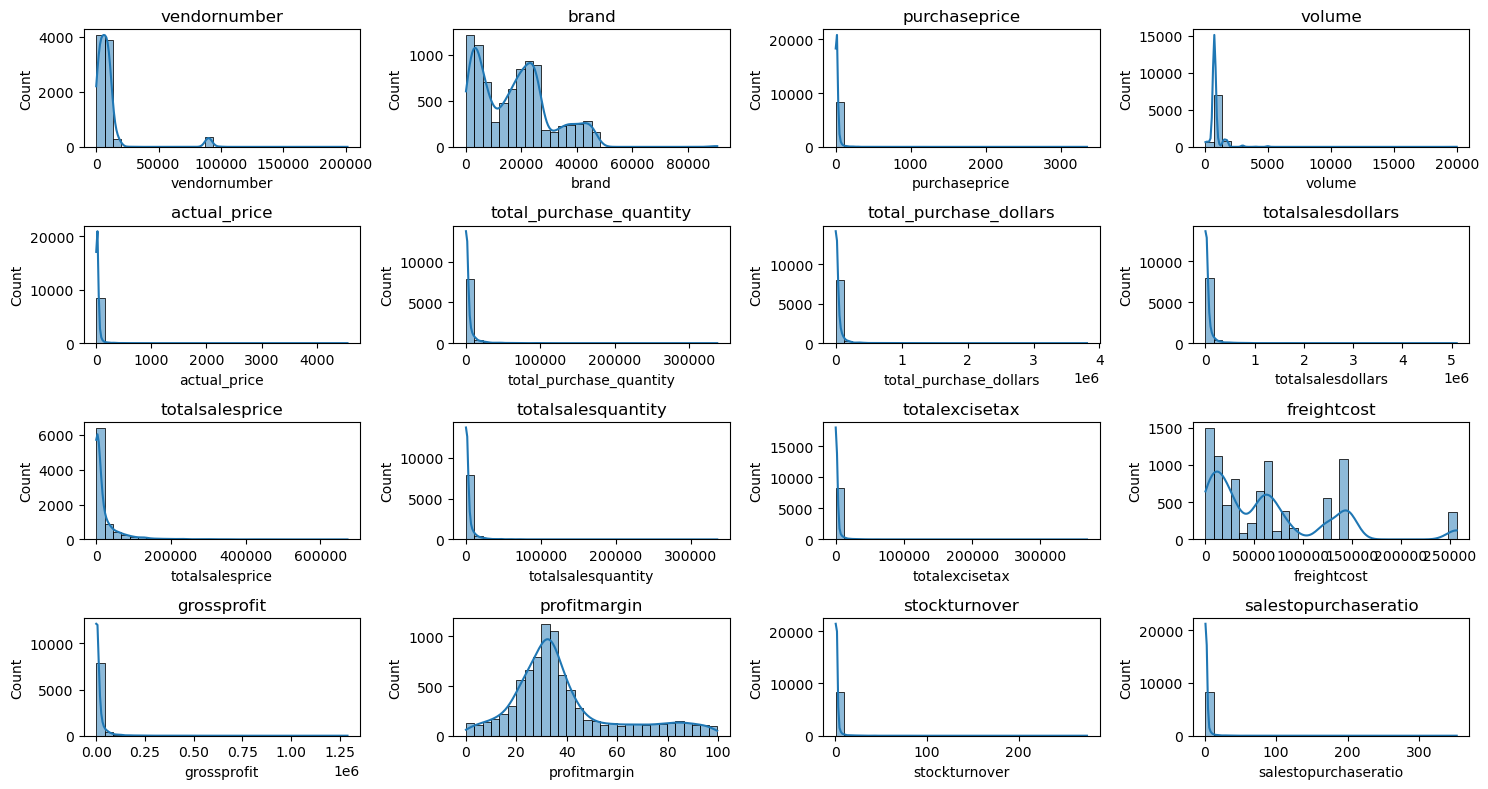

In [16]:
#distribution plots for numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,8))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

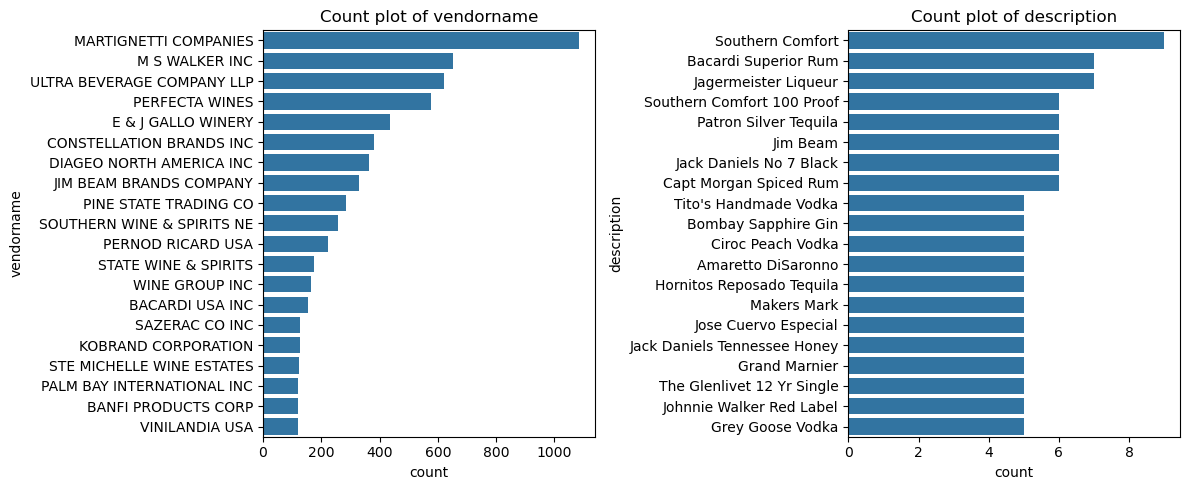

In [17]:
#count plots for categorical columns
#categorical_cols = ["vendorname", "description"]
categorical_cols = df.select_dtypes(include=object).columns

plt.figure(figsize=(12,5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:20])
    plt.title(f"Count plot of {col}")
plt.tight_layout()
plt.show()

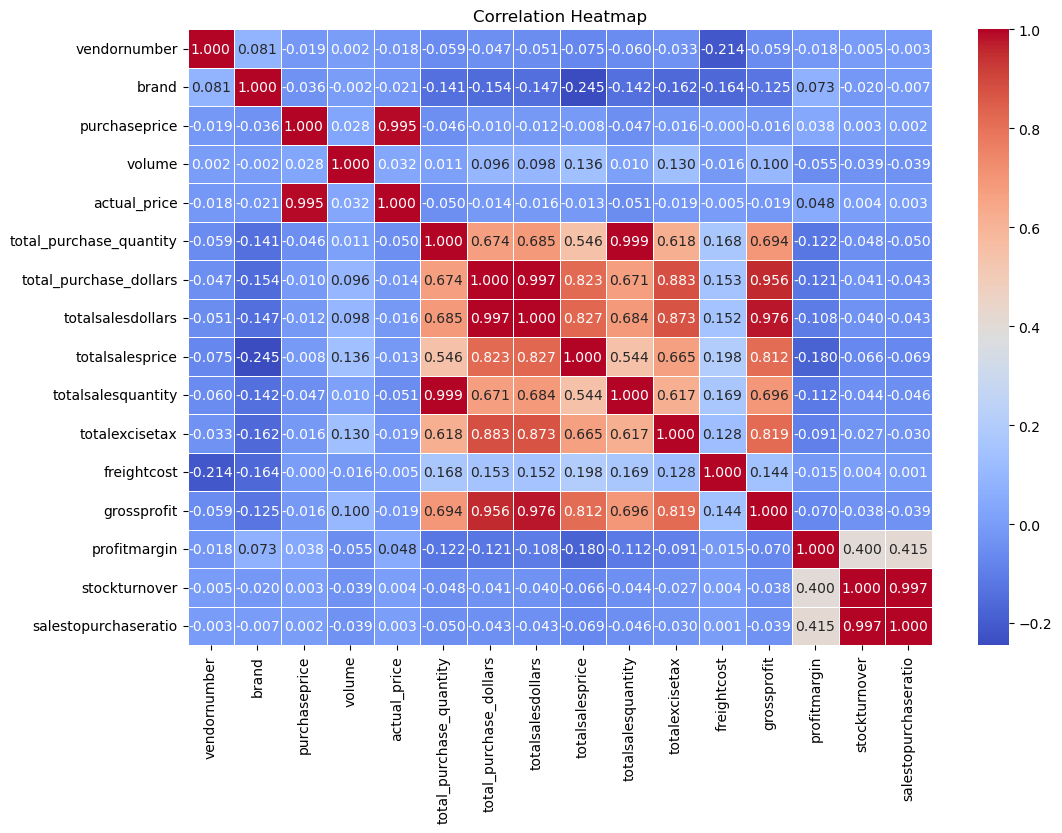

In [18]:
#correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap="coolwarm", linewidth=0.5)
plt.title("Correlation Heatmap")
plt.show()


## Correlation Insights

Here are some key insights derived from the correlation analysis:

* **Purchase Price's Limited Impact:** **PurchasePrice** shows only a **weak negative correlation** with **TotalSalesDollars** (-0.012) and **GrossProfit** (-0.016). This suggests that fluctuations in the purchase price of items do not significantly influence the overall sales revenue or the gross profit generated.

* **Efficient Inventory Turnover:** A **very strong positive correlation** exists between **total purchase quantity** and **total sales quantity** (0.999). This near-perfect correlation strongly indicates highly efficient inventory management and turnover, meaning almost everything purchased is subsequently sold.

* **Profit Margin and Sales Price Relationship:** There's a **negative correlation** between **ProfitMargin** and **TotalSalesPrice** (-0.179). This implies that as the total sales price increases, the profit margin tends to decrease. This could be a result of competitive pricing strategies, where higher sales volumes are achieved at the cost of narrower margins, or potentially due to selling larger volumes of lower-margin products.

* **Stock Turnover vs. Profitability:** **StockTurnover** exhibits **weak negative correlations** with both **GrossProfit** (-0.038) and **ProfitMargin** (-0.055). This suggests that merely moving inventory faster doesn't automatically translate into higher gross profit or better profit margins. Other factors, such as pricing strategy, cost management, or the type of products being turned over, likely play a more significant role in determining profitability.

---
# Data Analysis and Solve Research Questions
---

### 1. Identify Brands that needs promotionals or pricing adjustments which exhibit lower sales performance but higher profit margins

In [22]:
brand_performance = df.groupby('description').agg({
    'totalsalesdollars': 'sum',
    'profitmargin': 'mean'
}).reset_index()
brand_performance.sort_values(by='profitmargin', ascending=False)

,description,totalsalesdollars,profitmargin
5528,Pezzi King Svgn Bl Dry Creek,2221.29,99.604734
2411,DiSaronno Amaretto,4781.16,99.553246
6449,Skinnygirl Tangerine Vodka,2368.42,99.544844
657,Beniotome Sesame Shochu,4768.41,99.534226
4568,M Chiarlo Gavi Wh,1208.90,99.393664
...,...,...,...
5385,Parducci 13 True Grit Chard,24927.81,0.121190
2561,Douglass Hill Merlot,143.76,0.083472
2179,Croft Tawny Porto,191.84,0.041701
2954,Flint & Steel Svgn Bl Napa V,119.92,0.033356


In [23]:
# threshold for "low sales" (bottom 15%) and "high margin" (top 15%)
low_sales_threshold = brand_performance['totalsalesdollars'].quantile(0.15)
high_margin_threshold = brand_performance['profitmargin'].quantile(0.85)
print(f"Low sales threshold: {low_sales_threshold:.2f}")
print(f"High profit margin threshold: {high_margin_threshold:.2f}")

Low sales threshold: 560.30
High profit margin threshold: 64.97


In [24]:
# Filter brands with low sales but high profit margins
target_brands = brand_performance[
    (brand_performance['totalsalesdollars'] <= low_sales_threshold) &
    (brand_performance['profitmargin'] >= high_margin_threshold)
]
print("Brands with low sales but high profit margin")
target_brands.sort_values(by='totalsalesdollars', ascending=True)

Brands with low sales but high profit margin


,description,totalsalesdollars,profitmargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [25]:
brand_performance = brand_performance[brand_performance['totalsalesdollars'] < 5000] # for better visualization

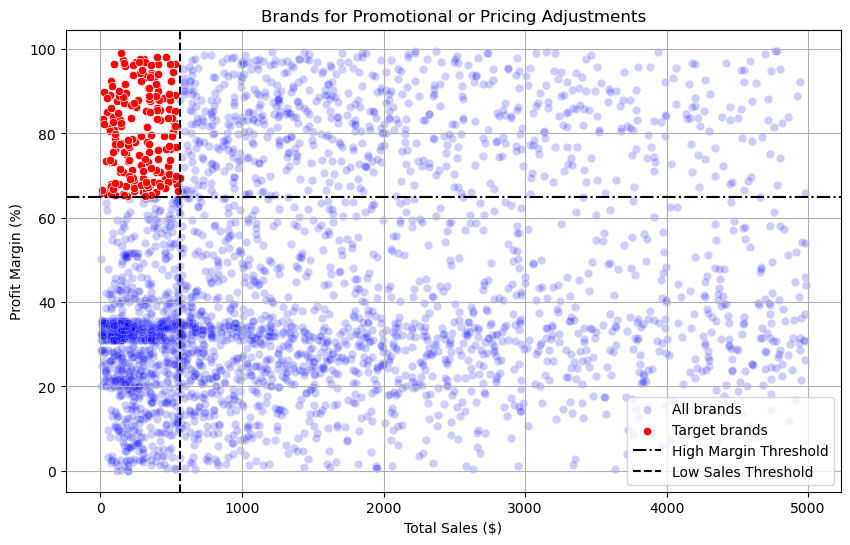

In [26]:
#scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance, x='totalsalesdollars', y='profitmargin', color='blue', label='All brands', alpha=0.2)
sns.scatterplot(data=target_brands, x='totalsalesdollars', y='profitmargin', color='red', label='Target brands')

plt.axhline(high_margin_threshold, linestyle='-.', color='black', label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

### 2. Which vendors and brands demonstrate the highest sales performance?

In [28]:
def format_dollars(value):
    if value >= 1000000:
        return f"{value / 1000000:.2f}M"
    elif value >= 1000:
        return f"{value / 1000:.2f}K"
    else:
        return str(value)

In [29]:
top_vendors = df.groupby('vendorname')['totalsalesdollars'].sum().nlargest(10)
top_brands = df.groupby('description')['totalsalesdollars'].sum().nlargest(10)
print(f"Top Vendors: \n{top_vendors}\n")
print(f"Top Brands: \n{top_brands}")

Top Vendors: 
vendorname
DIAGEO NORTH AMERICA INC      6.799010e+07
MARTIGNETTI COMPANIES         3.933036e+07
PERNOD RICARD USA             3.206320e+07
JIM BEAM BRANDS COMPANY       3.142302e+07
BACARDI USA INC               2.485482e+07
CONSTELLATION BRANDS INC      2.421875e+07
E & J GALLO WINERY            1.839990e+07
BROWN-FORMAN CORP             1.824723e+07
ULTRA BEVERAGE COMPANY LLP    1.650254e+07
M S WALKER INC                1.470646e+07
Name: totalsalesdollars, dtype: float64

Top Brands: 
description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: totalsalesdollars, dtype: float64


In [30]:
top_vendors.apply(lambda x:format_dollars(x))

vendorname
DIAGEO NORTH AMERICA INC      67.99M
MARTIGNETTI COMPANIES         39.33M
PERNOD RICARD USA             32.06M
JIM BEAM BRANDS COMPANY       31.42M
BACARDI USA INC               24.85M
CONSTELLATION BRANDS INC      24.22M
E & J GALLO WINERY            18.40M
BROWN-FORMAN CORP             18.25M
ULTRA BEVERAGE COMPANY LLP    16.50M
M S WALKER INC                14.71M
Name: totalsalesdollars, dtype: object

In [31]:
top_brands.apply(lambda x:format_dollars(x))

description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: totalsalesdollars, dtype: object

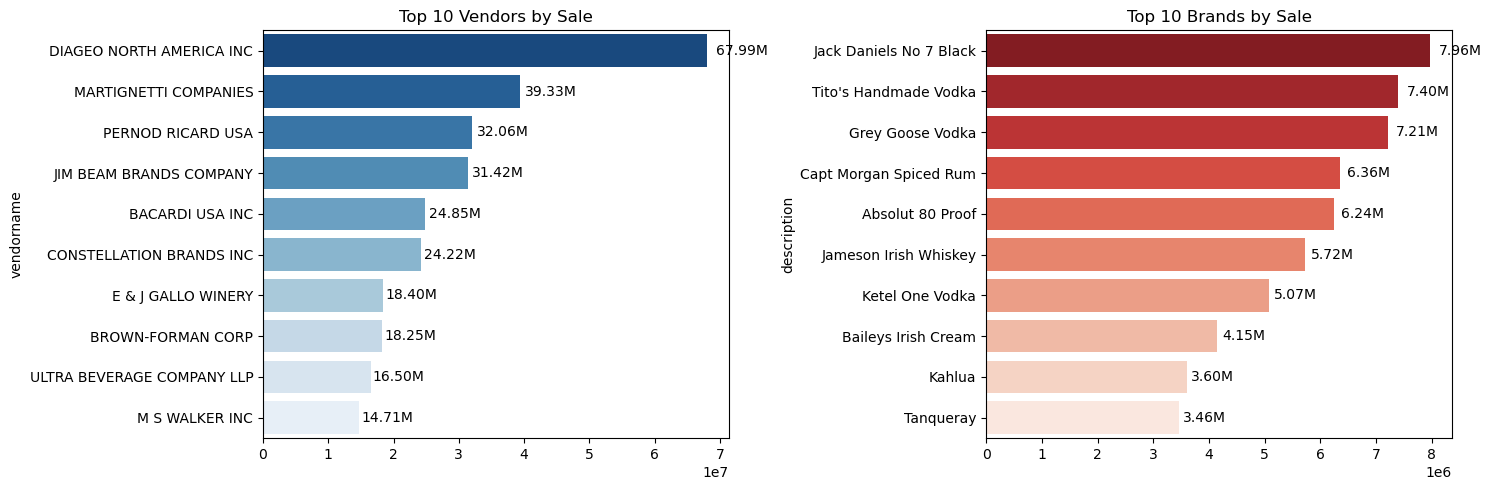

In [32]:
# plot
plt.figure(figsize=(15, 5))
# plot for top vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sale")
for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02), 
             bar.get_y() + bar.get_height() / 2, 
             format_dollars(bar.get_width()), 
             ha='left', va='center', fontsize=10, color='black')

# plot for top brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index, x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sale")
for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02), 
             bar.get_y() + bar.get_height() / 2, 
             format_dollars(bar.get_width()), 
             ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

### 3. Which vendors consistently generate high profit margins, regardless of sales volume?

In [34]:
high_margin_vendors = df[['vendornumber', 'vendorname', 'profitmargin', 'totalsalesquantity', 'grossprofit']]
high_margin_vendors = high_margin_vendors.sort_values(by='profitmargin', ascending=False)
high_margin_vendors = high_margin_vendors[high_margin_vendors['totalsalesquantity'] < 10000]

high_profit_margin_threshold = high_margin_vendors['profitmargin'].quantile(0.85)
low_profit_margin_threshold = high_margin_vendors['profitmargin'].quantile(0.15)

top_high_margin_vendors = high_margin_vendors.head(10)
top_high_margin_vendors

,vendornumber,vendorname,profitmargin,totalsalesquantity,grossprofit
8523,6213,MHW LTD,99.716657,2745.0,2709.85
8515,9165,ULTRA BEVERAGE COMPANY LLP,99.604734,171.0,2212.51
8440,2555,DISARONNO INTERNATIONAL LLC,99.553246,684.0,4759.80
8503,12546,JIM BEAM BRANDS COMPANY,99.544844,158.0,2357.64
8434,10754,PERFECTA WINES,99.534226,159.0,4746.20
8525,4692,KOBRAND CORPORATION,99.393664,110.0,1201.57
8412,7153,PINE STATE TRADING CO,99.361349,101.0,3912.84
8513,9552,M S WALKER INC,99.348356,103.0,1431.58
8444,4425,MARTIGNETTI COMPANIES,99.343273,105.0,3128.27
8183,9165,ULTRA BEVERAGE COMPANY LLP,99.183564,986.0,7813.82


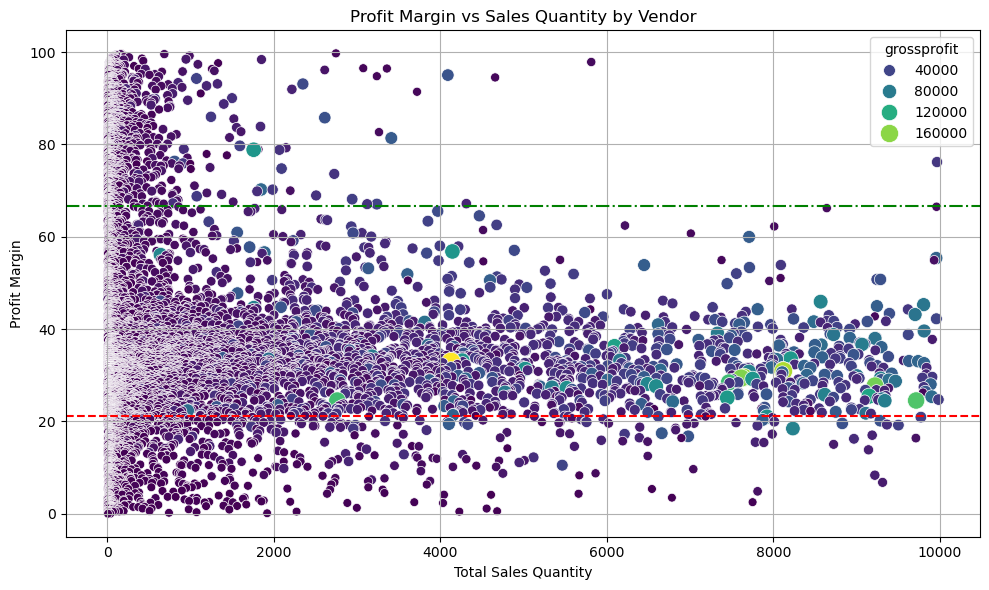

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=high_margin_vendors, 
    x='totalsalesquantity', 
    y='profitmargin', 
    hue='grossprofit', 
    size='grossprofit', 
    palette='viridis', 
    sizes=(40, 200)
)
plt.axhline(high_profit_margin_threshold, linestyle='-.', color='green', label="High Margin Threshold")
plt.axhline(low_profit_margin_threshold, linestyle='--', color='red', label="Low Margin Threshold")
plt.title('Profit Margin vs Sales Quantity by Vendor')
plt.xlabel('Total Sales Quantity')
plt.ylabel('Profit Margin')
plt.grid(True)
plt.tight_layout()
plt.show()

### Which vendors contribute the most to total purchase dollars?

In [37]:
vendor_performance = df.groupby('vendorname').agg({
    'total_purchase_dollars':'sum',
    'grossprofit':'sum',
    'totalsalesdollars':'sum'
}).reset_index()

# Calculate Contribution % to Overall Procurement
vendor_performance['purchase_contribution%'] = (vendor_performance['total_purchase_dollars'] / vendor_performance['total_purchase_dollars'].sum()) * 100 

# Rank Vendors by Total Purchase Dollars & Profitability
vendor_performance = round(vendor_performance.sort_values(by='purchase_contribution%', ascending=False), 2)

# Display Top 10 Vendors
top_vendors = vendor_performance.head(10)
top_vendors['total_purchase_dollars'] = top_vendors['total_purchase_dollars'].apply(format_dollars)
top_vendors['grossprofit'] = top_vendors['grossprofit'].apply(format_dollars)
top_vendors['totalsalesdollars'] = top_vendors['totalsalesdollars'].apply(format_dollars)
top_vendors

,vendorname,total_purchase_dollars,grossprofit,totalsalesdollars,purchase_contribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


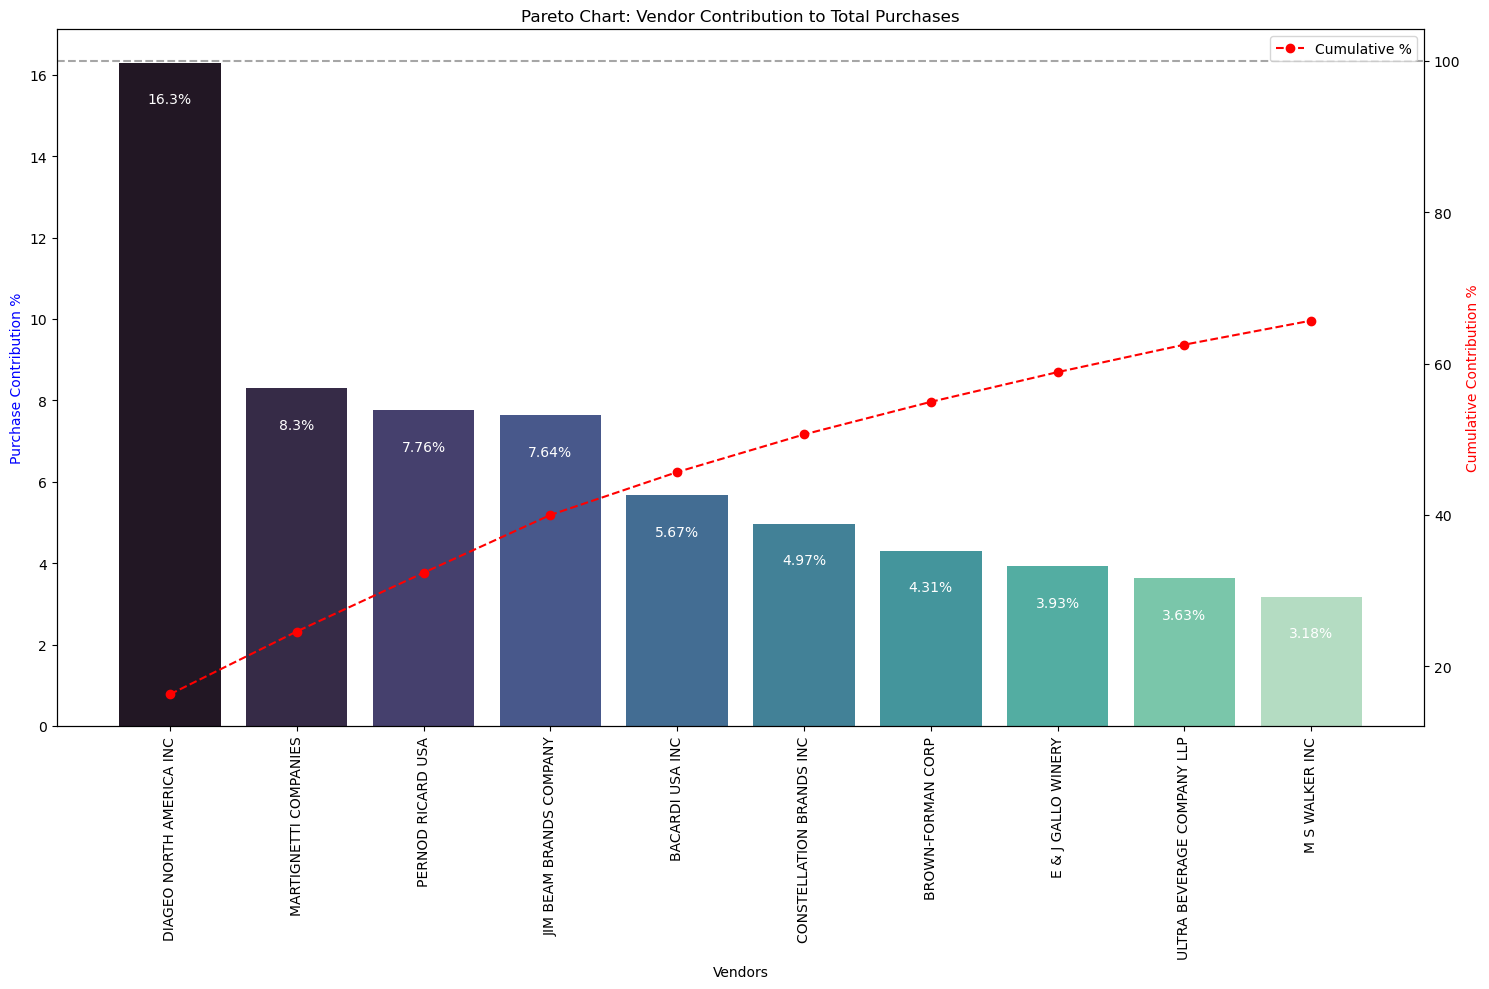

In [38]:
#Pareto chart
top_vendors['cumulative_contribution%'] = top_vendors['purchase_contribution%'].cumsum()

fig, ax1 = plt.subplots(figsize=(15, 10))

#bar chart
sns.barplot(x=top_vendors['vendorname'], y=top_vendors['purchase_contribution%'],  palette="mako", ax=ax1)
for i, value in enumerate(top_vendors['purchase_contribution%']):
    ax1.text(i, value - 1, str(value)+'%', ha='center', fontsize=10, color='white')

# Line Plot for Cumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors['vendorname'], top_vendors['cumulative_contribution%'], color='red', marker='o', linestyle='dashed', label='Cumulative %')

ax1.set_xticklabels(top_vendors['vendorname'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

### Are low-volume vendors more profitable per unit than high-volume vendors?

In [40]:
df['profit_per_unit'] = df['grossprofit'] / df['totalsalesquantity']
sorted_df = df[['vendornumber', 'vendorname', 'totalsalesquantity', 'grossprofit', 'profit_per_unit']]
sorted_df = sorted_df.sort_values(by=['totalsalesquantity', 'profit_per_unit'], ascending=[True, False])

sorted_df['volume_group'] = pd.qcut(df['totalsalesquantity'], q=3, labels=['Low', 'Medium', 'High'])
sorted_df

,vendornumber,vendorname,totalsalesquantity,grossprofit,profit_per_unit,volume_group
4969,12546,JIM BEAM BRANDS COMPANY,1.0,881.48,881.480000,Low
4902,3664,WILLIAM GRANT & SONS INC,1.0,786.82,786.820000,Low
5750,2561,EDRINGTON AMERICAS,1.0,388.89,388.890000,Low
6990,17035,PERNOD RICARD USA,1.0,163.67,163.670000,Low
7153,4692,KOBRAND CORPORATION,1.0,122.45,122.450000,Low
...,...,...,...,...,...,...
13,10000,MAJESTIC FINE WINES,214238.0,865935.42,4.041932,High
342,3960,DIAGEO NORTH AMERICA INC,225741.0,56180.69,0.248872,High
324,8004,SAZERAC CO INC,241963.0,63392.49,0.261992,High
307,3960,DIAGEO NORTH AMERICA INC,253371.0,67364.01,0.265871,High


In [41]:
sorted_df.groupby('volume_group')['profit_per_unit'].mean().reset_index()

,volume_group,profit_per_unit
0,Low,27.145501
1,Medium,8.088679
2,High,4.889840


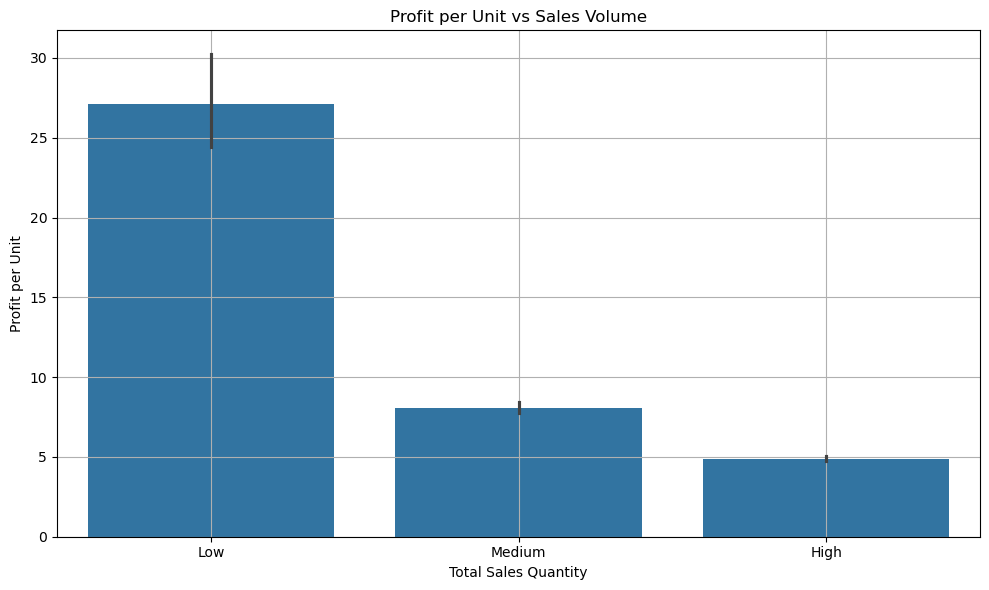

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(data=sorted_df, x='volume_group', y='profit_per_unit')
plt.title('Profit per Unit vs Sales Volume')
plt.xlabel('Total Sales Quantity')
plt.ylabel('Profit per Unit')
plt.grid(True)
plt.tight_layout()
plt.show()

### How much of total procurement is dependent on the top vendors?

In [44]:
print(f"Total purchase contribution of top 10 vendors is {round(top_vendors['purchase_contribution%'].sum(), 2)}%")

Total purchase contribution of top 10 vendors is 65.69%


In [45]:
vendors = list(top_vendors['vendorname'].values)
purchase_contributions = list(top_vendors['purchase_contribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribytion = 100 - total_contribution

In [46]:
vendors.append("Other vendors")
purchase_contributions.append(remaining_contribytion) 

Total purchase contribution of top 10 vendors is 65.69%


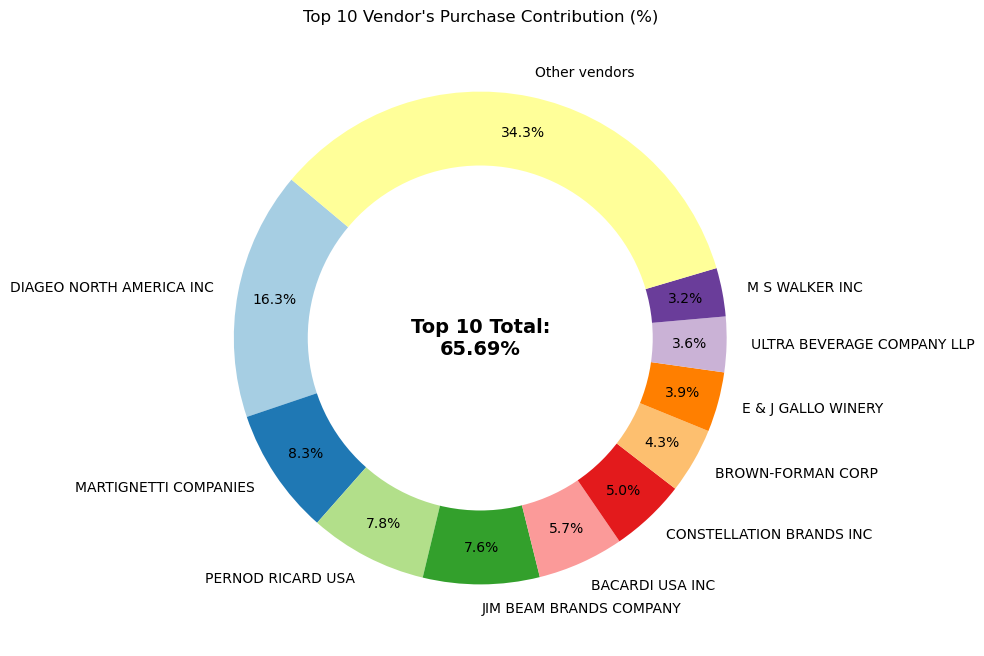

In [47]:
print(f"Total purchase contribution of top 10 vendors is {round(top_vendors['purchase_contribution%'].sum(), 2)}%")
#donut chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotext = ax.pie(purchase_contributions, labels=vendors, autopct='%1.1f%%', startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the center
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()

### Is there a correlation between freight cost and profit margin?

In [49]:
df['freight_burden'] = df['freightcost'] / df['grossprofit']
high_burden = df[df['freight_burden'] > 0.5]  # Adjust threshold as needed
high_burden_sorted = high_burden.sort_values(by='profitmargin').head(10)
high_burden_sorted[['vendorname', 'freightcost', 'grossprofit', 'freight_burden', 'profitmargin']]

,vendorname,freightcost,grossprofit,freight_burden,profitmargin
7448,TREASURY WINE ESTATES,14836.57,0.04,3.709143e+05,0.020842
6375,E & J GALLO WINERY,61966.91,0.12,5.163909e+05,0.020846
7806,M S WALKER INC,55551.82,0.04,1.388795e+06,0.033356
7449,KOBRAND CORPORATION,9139.38,0.08,1.142422e+05,0.041701
7687,MARTIGNETTI COMPANIES,144929.24,0.12,1.207744e+06,0.083472
2244,M S WALKER INC,55551.82,30.21,1.838855e+03,0.121190
2388,STATE WINE & SPIRITS,8014.98,49.23,1.628068e+02,0.221831
6450,ULTRA BEVERAGE COMPANY LLP,68054.70,1.73,3.933798e+04,0.327788
1179,MARTIGNETTI COMPANIES,144929.24,203.49,7.122180e+02,0.351704
7249,BROWN-FORMAN CORP,68601.68,0.95,7.221229e+04,0.406209


In [50]:
correlation = df[['freightcost', 'profitmargin']].corr(method='pearson')
print("📈 Pearson Correlation:\n", correlation)

📈 Pearson Correlation:
               freightcost  profitmargin
freightcost      1.000000     -0.014563
profitmargin    -0.014563      1.000000


### Which vendors have low stock turnover but high sales-to-purchase ratio?

In [52]:
# Step 1: Filter based on conditions
filtered_vendors = df[
    (df['stockturnover'] < 5.0) & 
    (df['salestopurchaseratio'] > 7)
]

# Step 2: Sort and review
filtered_vendors = filtered_vendors.sort_values(by='salestopurchaseratio', ascending=False)
filtered_vendors[['vendorname', 'stockturnover', 'salestopurchaseratio', 'totalsalesquantity', 'total_purchase_quantity', 'stockturnover', 'salestopurchaseratio']]

,vendorname,stockturnover,salestopurchaseratio,totalsalesquantity,total_purchase_quantity,stockturnover,salestopurchaseratio
8158,PALM BAY INTERNATIONAL INC,4.800000,9.442451,72.0,15.0,4.800000,9.442451
6119,PERFECTA WINES,4.560000,9.156568,114.0,25.0,4.560000,9.156568
7073,PINE STATE TRADING CO,4.916667,9.017726,118.0,24.0,4.916667,9.017726
7005,PERFECTA WINES,4.925000,8.440073,197.0,40.0,4.925000,8.440073
7441,PERFECTA WINES,4.800000,8.402482,96.0,20.0,4.800000,8.402482
8162,VINILANDIA USA,4.846154,8.272473,63.0,13.0,4.846154,8.272473
6185,MARTIGNETTI COMPANIES,4.916667,8.151405,236.0,48.0,4.916667,8.151405
7541,MARTIGNETTI COMPANIES,4.916667,8.053737,118.0,24.0,4.916667,8.053737
8379,M S WALKER INC,4.357143,7.876474,61.0,14.0,4.357143,7.876474
6753,MHW LTD,4.882353,7.839771,166.0,34.0,4.882353,7.839771


### Are any vendors incurring losses (negative gross profit)?

In [54]:
# Step 1: Filter vendors with negative gross profit
loss_vendors = df[df['grossprofit'] < 0]

# Step 2: Sort by most loss
loss_vendors = loss_vendors.sort_values(by='grossprofit')

# Step 3: Display relevant fields
loss_vendors[['vendorname', 'grossprofit', 'totalsalesquantity', 'profitmargin', 'freightcost', 'totalexcisetax']]


,vendorname,grossprofit,totalsalesquantity,profitmargin,freightcost,totalexcisetax


There is no vendors incurring loss currently

### Which vendors contribute the most to dead stock?

In [57]:
# Step 1: Filter for dead stock indicators
dead_stock_vendors = df[
    (df['stockturnover'] < 50) &
    (df['totalsalesquantity'] < 2000) &
    (df['total_purchase_quantity'] > 2000)
]

# Step 2: Sort by purchase quantity
dead_stock_vendors = dead_stock_vendors.sort_values(by='total_purchase_quantity', ascending=False)

# Step 3: Display relevant info
dead_stock_vendors[['vendorname', 'total_purchase_quantity', 'totalsalesquantity', 'stockturnover', 'salestopurchaseratio']]


,vendorname,total_purchase_quantity,totalsalesquantity,stockturnover,salestopurchaseratio
2244,M S WALKER INC,2912.0,1919.0,0.658997,1.001213
2207,PROXIMO SPIRITS INC.,2638.0,1850.0,0.701289,1.027581
2886,PERFECTA WINES,2510.0,1993.0,0.794024,1.320333
2644,MARTIGNETTI COMPANIES,2481.0,1922.0,0.774688,1.101016
970,EDRINGTON AMERICAS,2443.0,1879.0,0.769136,1.091896
2347,MARTIGNETTI COMPANIES,2391.0,1558.0,0.651610,1.017272
1864,JIM BEAM BRANDS COMPANY,2306.0,1996.0,0.865568,1.229221
1980,PERNOD RICARD USA,2291.0,1820.0,0.794413,1.033447
2289,E & J GALLO WINERY,2290.0,1761.0,0.768996,1.182708
2303,KOBRAND CORPORATION,2253.0,1878.0,0.833555,1.029646


### What is the average profit per unit for each brand and vendor?

In [59]:
# Step 1: Create profit per unit column
df['profit_per_unit'] = df['grossprofit'] / df['totalsalesquantity']

# Step 2: Average profit per unit by vendor
vendor_profit = df.groupby('vendorname')['profit_per_unit'].mean().reset_index()
vendor_profit = vendor_profit.sort_values(by='profit_per_unit', ascending=False)

# Step 3: Average profit per unit by brand
brand_profit = df.groupby('description')['profit_per_unit'].mean().reset_index()
brand_profit = brand_profit.sort_values(by='profit_per_unit', ascending=False)

In [60]:
vendor_profit.head()

,vendorname,profit_per_unit
1,ALISA CARR BEVERAGES,122.992243
31,EDRINGTON AMERICAS,66.962198
61,MOET HENNESSY USA INC,61.544828
88,SOUTHERN WINE & SPIRITS NE,40.997817
116,WILLIAM GRANT & SONS INC,37.649757


In [61]:
brand_profit.head()

,description,profit_per_unit
3527,Hennessy Richard Cognac,2182.292500
3524,Hennessy Paradis Imperial,1293.743333
4273,Ladyburn 41 Yr Old Scotch,966.403333
1514,Ch Cheval Blanc 10 Brdx,925.158750
2149,Courvoisier L'Essence Cognac,881.480000


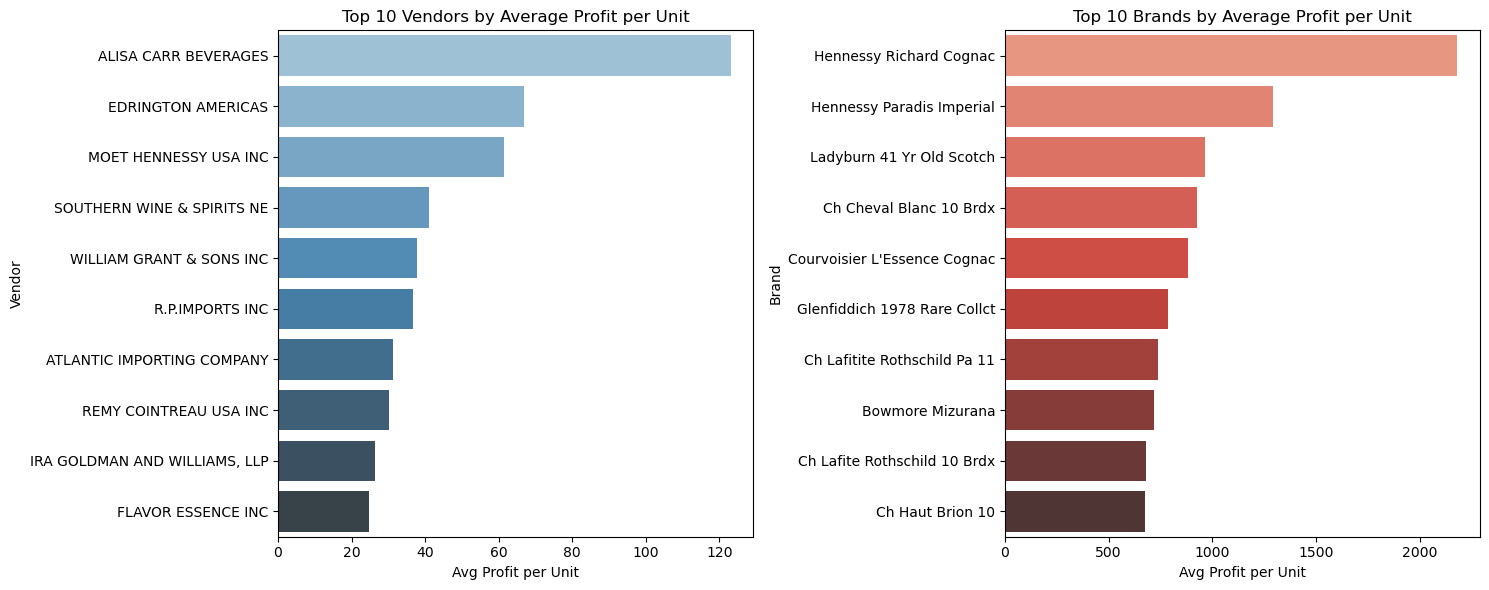

In [62]:
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
sns.barplot(data=vendor_profit.head(10), x='profit_per_unit', y='vendorname', palette='Blues_d')
plt.title('Top 10 Vendors by Average Profit per Unit')
plt.xlabel('Avg Profit per Unit')
plt.ylabel('Vendor')

plt.subplot(1,2,2)
sns.barplot(data=brand_profit.head(10), x='profit_per_unit', y='description', palette='Reds_d')
plt.title('Top 10 Brands by Average Profit per Unit')
plt.xlabel('Avg Profit per Unit')
plt.ylabel('Brand')

plt.tight_layout()
plt.show()

### Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?

In [64]:
# Calculate Unit Purchase Price per Vendor & Volume Group
df['unitpurchaseprice'] = df['total_purchase_dollars'] / df['total_purchase_quantity']
# Group by Order Sizes (e.g., Small, Medium, Large Purchases)
df['ordersize'] = pd.qcut(df['total_purchase_quantity'], q=3, labels=['small', 'medium', 'large'])
df[['ordersize', 'total_purchase_quantity', 'unitpurchaseprice']]

,ordersize,total_purchase_quantity,unitpurchaseprice
0,large,145080.0,26.27
1,large,164038.0,23.19
2,large,187407.0,18.24
3,large,201682.0,16.17
4,large,138109.0,21.89
...,...,...,...
8559,small,2.0,1.32
8560,small,6.0,0.39
8561,small,2.0,0.74
8562,small,1.0,1.47


In [65]:
# Analyze Cost Savings per Order Size
df.groupby('ordersize')['unitpurchaseprice'].mean().reset_index()

,ordersize,unitpurchaseprice
0,small,39.068186
1,medium,15.486414
2,large,10.777625


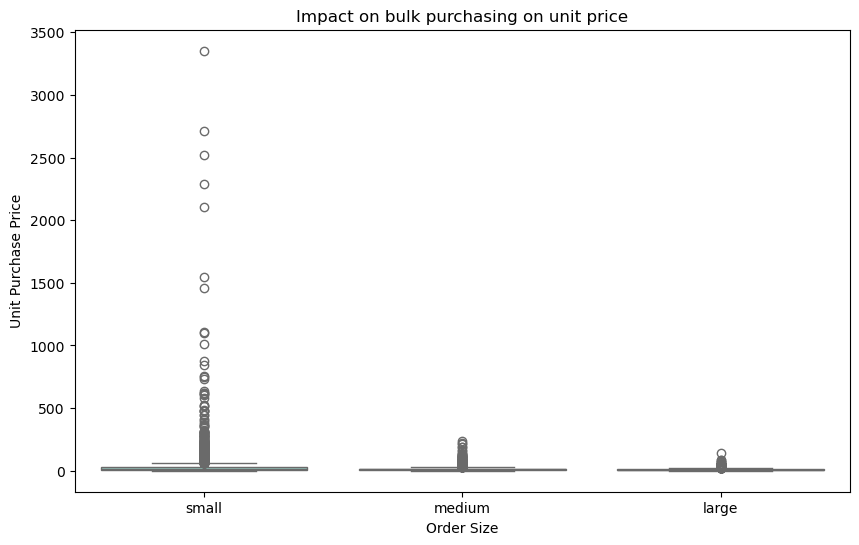

In [66]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='ordersize', y='unitpurchaseprice', palette="Set3")
plt.xlabel("Order Size")
plt.ylabel("Unit Purchase Price")
plt.title("Impact on bulk purchasing on unit price")
plt.show()

- Vendors buying in bulk (Large Order Size) get the lowest unit price ($10.78 per unit), meaning higher margins if they can manage inventory efficiently.
- The price difference between Small and Large orders is substantial (~72% reduction in unit cost)
- This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue.

### Which vendors have low inventory turnover, indicating excess stock and slow-moving products?

In [69]:
df[df['stockturnover'] < 1]\
.groupby('vendorname')['stockturnover'].mean()\
.reset_index()\
.sort_values(by='stockturnover', ascending=True)\
.head(10)

,vendorname,stockturnover
0,ALISA CARR BEVERAGES,0.615385
36,HIGHLAND WINE MERCHANTS LLC,0.708333
60,PARK STREET IMPORTS LLC,0.751306
19,Circa Wines,0.755676
26,Dunn Wine Brokers,0.766022
15,CENTEUR IMPORTS LLC,0.773953
78,SMOKY QUARTZ DISTILLERY LLC,0.783835
90,TAMWORTH DISTILLING,0.797078
91,THE IMPORTED GRAPE LLC,0.807569
101,WALPOLE MTN VIEW WINERY,0.820548


### How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?

In [71]:
df.dtypes

vendornumber                  int64
vendorname                   object
description                  object
brand                         int64
purchaseprice               float64
volume                      float64
actual_price                float64
total_purchase_quantity     float64
total_purchase_dollars      float64
totalsalesdollars           float64
totalsalesprice             float64
totalsalesquantity          float64
totalexcisetax              float64
freightcost                 float64
grossprofit                 float64
profitmargin                float64
stockturnover               float64
salestopurchaseratio        float64
profit_per_unit             float64
freight_burden              float64
unitpurchaseprice           float64
ordersize                  category
dtype: object

In [72]:
#calculate unsold inventory value
df['unsold_inventory_value'] = (df['total_purchase_quantity'] - df['totalsalesquantity']) * df['unitpurchaseprice']
print(f"Total Unsold Inventory Capital: {format_dollars(df['unsold_inventory_value'].sum())}")

inventory_value_per_vendor = df.groupby('vendorname')['unsold_inventory_value'].sum().reset_index()
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by='unsold_inventory_value', ascending=False)
inventory_value_per_vendor['unsold_inventory_value'] = inventory_value_per_vendor['unsold_inventory_value'].apply(format_dollars)
inventory_value_per_vendor.head(10)

Total Unsold Inventory Capital: 2.71M


,vendorname,unsold_inventory_value
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


### What is the 95% confidence intervals for profit margins of top-performing and low-performing vendors.

In [74]:
top_threshold = df['totalsalesdollars'].quantile(0.75)
low_threshold = df['totalsalesdollars'].quantile(0.25)

In [75]:
top_vendors = df[df["totalsalesdollars"] >= top_threshold]["profitmargin"].dropna()
low_vendors = df[df["totalsalesdollars"] <= low_threshold]["profitmargin"].dropna()

In [76]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))
    t_critical = stats.t.ppf((1+confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

# Compute confidence intervals
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

Top Vendors 95% CI: (30.74, 31.61), Mean: 31.18


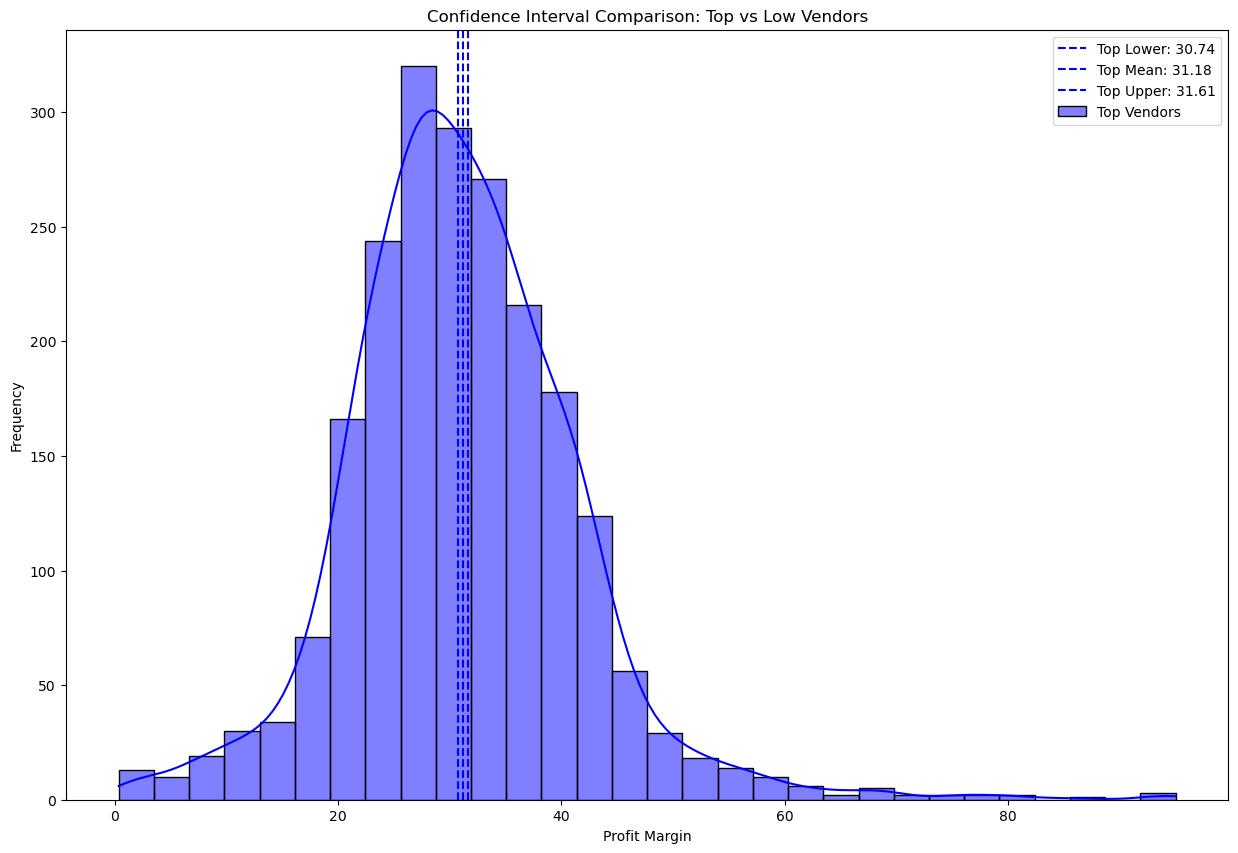

In [77]:
print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
plt.figure(figsize=(15, 10))

#top vendors plot
sns.histplot(top_vendors, kde=True, bins=30, color='blue', label='Top Vendors')
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_mean, color="blue", linestyle="--", label=f"Top Mean: {top_mean:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")

plt.xlabel("Profit Margin")
plt.ylabel("Frequency")
plt.title("Confidence Interval Comparison: Top vs Low Vendors")
plt.legend()
plt.show()

Low Vendors 95% CI: (40.50, 42.64), Mean: 41.57


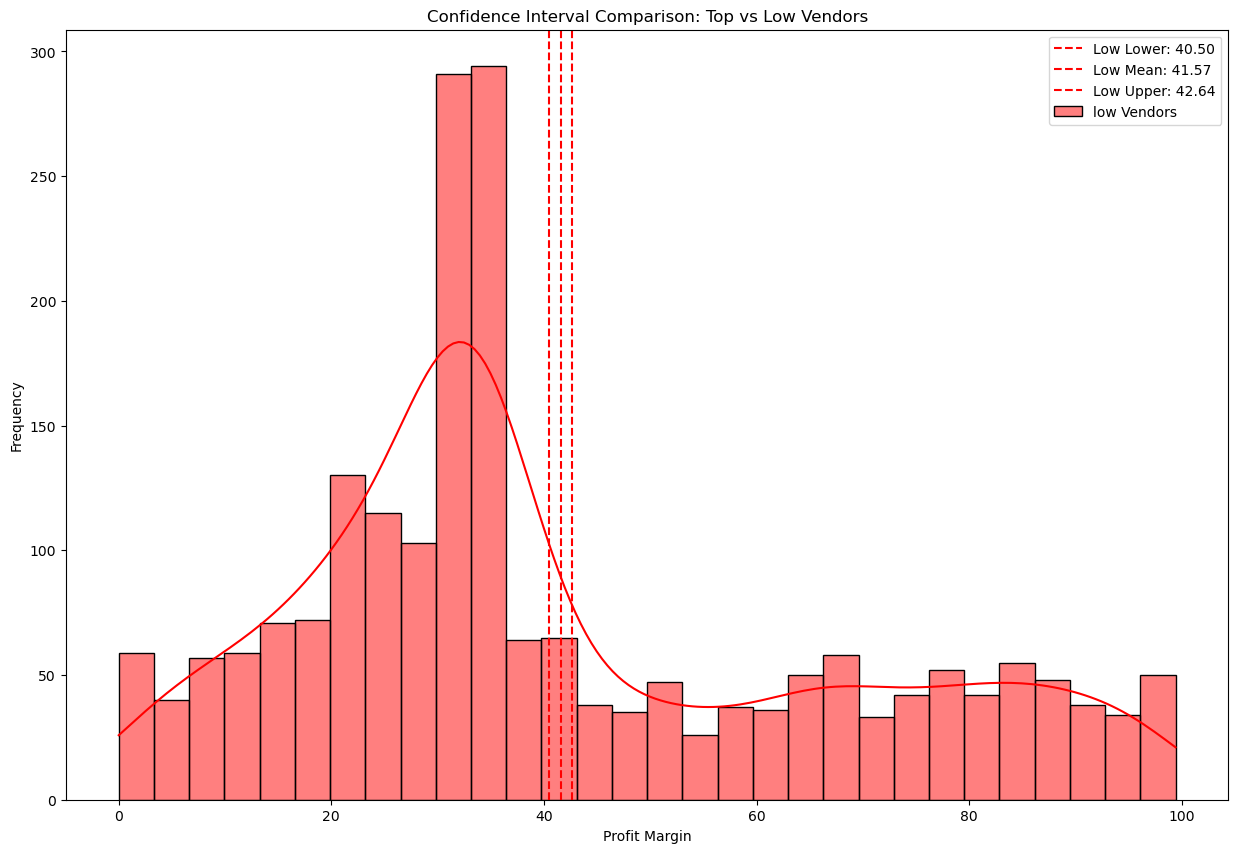

In [78]:
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(15, 10))

#low vendors plot
sns.histplot(low_vendors, kde=True, bins=30, color='red', label='low Vendors')
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_mean, color="red", linestyle="--", label=f"Low Mean: {low_mean:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")

plt.xlabel("Profit Margin")
plt.ylabel("Frequency")
plt.title("Confidence Interval Comparison: Top vs Low Vendors")
plt.legend()
plt.show()

Top Vendors 95% CI: (30.74, 31.61), Mean: 31.18
Low Vendors 95% CI: (40.50, 42.64), Mean: 41.57


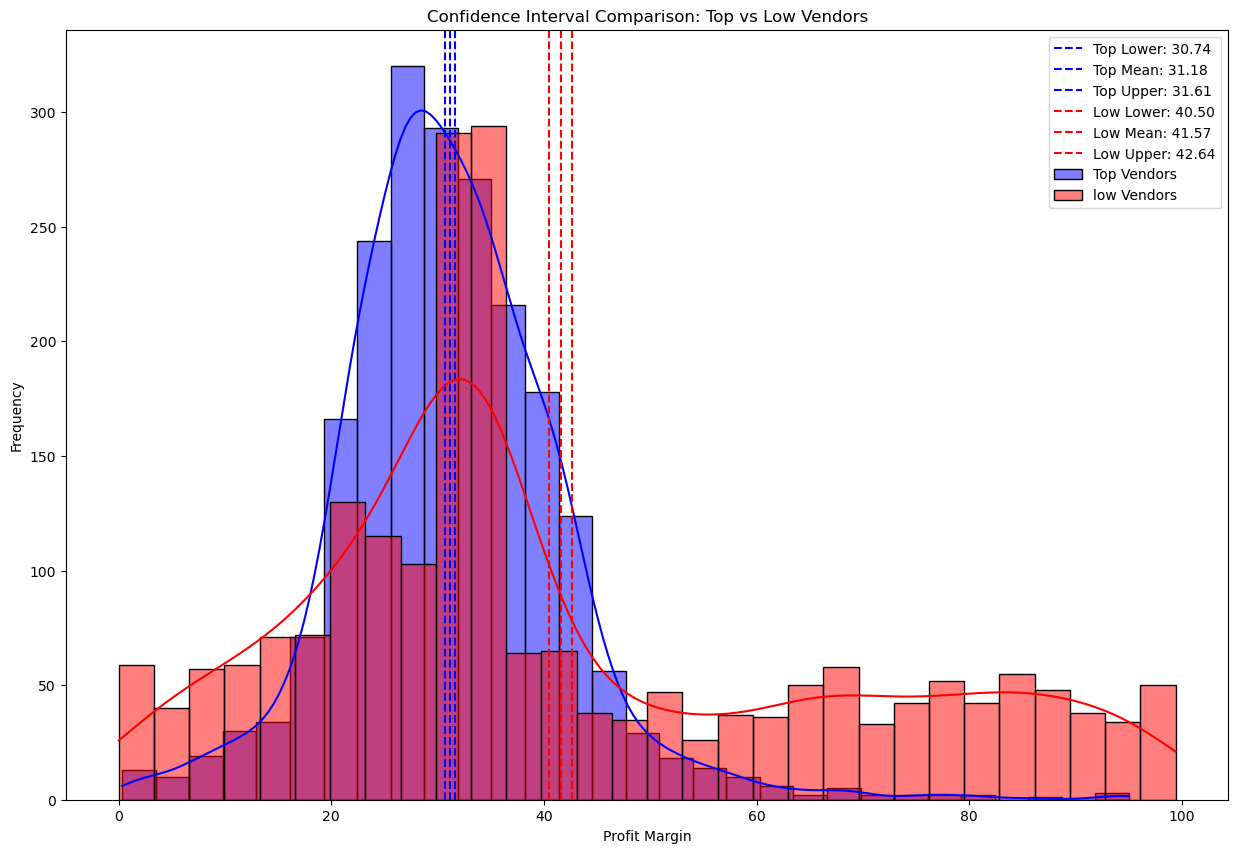

In [79]:
print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(15, 10))

#top vendors plot
sns.histplot(top_vendors, kde=True, bins=30, color='blue', label='Top Vendors')
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_mean, color="blue", linestyle="--", label=f"Top Mean: {top_mean:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")

#low vendors plot
sns.histplot(low_vendors, kde=True, bins=30, color='red', label='low Vendors')
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_mean, color="red", linestyle="--", label=f"Low Mean: {low_mean:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")

plt.xlabel("Profit Margin")
plt.ylabel("Frequency")
plt.title("Confidence Interval Comparison: Top vs Low Vendors")
plt.legend()
plt.show()

## Is there a significant difference in profit margins between top-performing and low-performing vendors?

#### Hypothesis:

**H₀ (Null Hypothesis)**: There is no significant difference in the mean profit margins of top-performing and low-performing vendors.

**H₁ (Alternative Hypothesis)**: The mean profit margins of top-performing and low-performing vendors are significantly different.

In [81]:
# Perform Two-Sample T-Test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject H₀: No significant difference in profit margins.")

T-Statistic: -17.6695, P-Value: 0.0000
Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.


In [82]:
df.to_csv("../vendor_performance_ml/data/final_vendor_analysis.csv", index=False)

In [198]:
stockturnover_df = df.copy()

In [204]:
stockturnover_df = stockturnover_df[stockturnover_df["stockturnover"] < 1]
stockturnover_df = stockturnover_df.groupby("vendorname")["stockturnover"].mean().reset_index()
stockturnover_df = stockturnover_df.sort_values(by='stockturnover', ascending=False)

In [206]:
stockturnover_df.to_csv("../data/processed/stockturnover.csv", index=False)

In [208]:
df.head()

,vendornumber,vendorname,description,brand,purchaseprice,volume,actual_price,total_purchase_quantity,total_purchase_dollars,totalsalesdollars,...,freightcost,grossprofit,profitmargin,stockturnover,salestopurchaseratio,profit_per_unit,freight_burden,unitpurchaseprice,ordersize,unsold_inventory_value
0,1128,BROWN-FORMAN CORP,Jack Daniels No 7 Black,1233,26.27,1750.0,36.99,145080.0,3811251.60,5101919.51,...,68601.68,1290667.91,25.297693,0.979108,1.338647,9.086075,0.053152,26.27,large,79624.37
1,4425,MARTIGNETTI COMPANIES,Tito's Handmade Vodka,3405,23.19,1750.0,28.99,164038.0,3804041.22,4819073.49,...,144929.24,1015032.27,21.062810,0.976890,1.266830,6.334173,0.142783,23.19,large,87913.29
2,17035,PERNOD RICARD USA,Absolut 80 Proof,8068,18.24,1750.0,24.99,187407.0,3418303.68,4538120.60,...,123780.22,1119816.92,24.675786,0.998575,1.327594,5.983846,0.110536,18.24,large,4870.08
3,3960,DIAGEO NORTH AMERICA INC,Capt Morgan Spiced Rum,4261,16.17,1750.0,22.99,201682.0,3261197.94,4475972.88,...,257032.07,1214774.94,27.139908,0.993703,1.372493,6.061388,0.211588,16.17,large,20535.90
4,3960,DIAGEO NORTH AMERICA INC,Ketel One Vodka,3545,21.89,1750.0,29.99,138109.0,3023206.01,4223107.62,...,257032.07,1199901.61,28.412764,0.983556,1.396897,8.833328,0.214211,21.89,large,49712.19


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8564 entries, 0 to 8563
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   vendornumber             8564 non-null   int64   
 1   vendorname               8564 non-null   object  
 2   description              8564 non-null   object  
 3   brand                    8564 non-null   int64   
 4   purchaseprice            8564 non-null   float64 
 5   volume                   8564 non-null   float64 
 6   actual_price             8564 non-null   float64 
 7   total_purchase_quantity  8564 non-null   float64 
 8   total_purchase_dollars   8564 non-null   float64 
 9   totalsalesdollars        8564 non-null   float64 
 10  totalsalesprice          8564 non-null   float64 
 11  totalsalesquantity       8564 non-null   float64 
 12  totalexcisetax           8564 non-null   float64 
 13  freightcost              8564 non-null   float64 
 14  grosspro